## Observations and Insights 

In [313]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random as rd
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "test_data/Mouse_metadata.csv"
study_results_path = "test_data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_ids = pd.DataFrame(combined_df['Mouse ID'].to_numpy())
mice_count = mice_ids[0].drop_duplicates()
mice_count = pd.DataFrame({'Mice Count': [len(mice_count)]})
mice_count.head()

,Mice Count
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_df.groupby(['Mouse ID'],as_index = True)
dup_mice = pd.DataFrame(dup_mice['Timepoint'].value_counts())
dup_mice = dup_mice.rename(columns={"Timepoint":"Count"})
dups_filtered = dup_mice[dup_mice['Count'] > 1]
dups_filtered = dups_filtered.index.droplevel(level = 1)
dup_miceid = dups_filtered[0]
dup_miceid_df = pd.DataFrame({'Duplicated Mice ID': [dups_filtered[0]]})
dup_miceid_df

,Duplicated Mice ID
0,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined_df[combined_df['Mouse ID'] == dup_miceid]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_df = combined_df[combined_df['Mouse ID'] != dup_miceid]
final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
nmice_ids = pd.DataFrame(final_df['Mouse ID'].to_numpy())
nmice_count = nmice_ids[0].drop_duplicates()
nmice_count = pd.DataFrame({'Mice Count': [len(nmice_count)]})
nmice_count.head()

,Mice Count
0,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
get_stats = final_df[['Drug Regimen','Tumor Volume (mm3)']]
med_stats = get_stats.groupby(['Drug Regimen']).mean()
med_stats = med_stats.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Mean (mm3)"})
med_stats['Tumor Volume Median (mm3)'] = get_stats.groupby(['Drug Regimen']).median()
med_stats['Tumor Volume Variance (mm3)'] = get_stats.groupby(['Drug Regimen']).var()
med_stats['Tumor Volume Std. Deviation (mm3)'] = get_stats.groupby(['Drug Regimen']).std()
med_stats['Tumor Volume Std. Error of Mean (mm3)'] = get_stats.groupby(['Drug Regimen']).sem()
med_stats

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume Std. Deviation (mm3),Tumor Volume Std. Error of Mean (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
med_stats2 = get_stats.groupby(['Drug Regimen'])
med_stats2 = med_stats2.agg(['mean', 'median', 'var', 'std','sem'],axis=1)
med_stats2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Measurement Count Per Drug Regimen'}, xlabel='Drug Regimes', ylabel='Number of Measurements'>

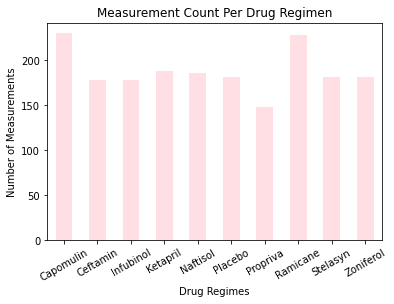

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_chart = final_df[['Drug Regimen','Tumor Volume (mm3)']]
bar_chart = bar_chart.groupby(['Drug Regimen'],as_index=False).count()
bar_chart = bar_chart.rename(columns={"Tumor Volume (mm3)":"Measurement Count"})
bar_final = bar_chart.plot(kind='bar',color = 'pink',x='Drug Regimen',y="Measurement Count",alpha=0.5,
            title='Measurement Count Per Drug Regimen',rot=30,legend=False)
bar_final.set_xlabel('Drug Regimes')
bar_final.set_ylabel('Number of Measurements')
bar_final

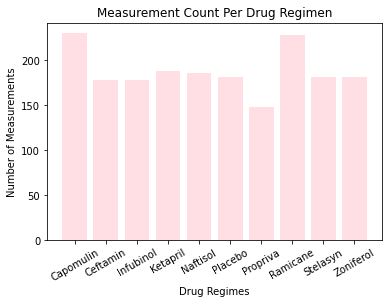

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
meds = bar_chart['Drug Regimen'].to_list()
y_axis = bar_chart['Measurement Count'].to_list()
x_axis = np.arange(len(meds))
plt.bar(x_axis, y_axis, color='pink', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, meds, rotation=30)
plt.title('Measurement Count Per Drug Regimen')
plt.xlabel('Drug Regimes')
plt.ylabel('Number of Measurements')
plt.show()

<AxesSubplot:title={'center':'Percentage of Male vs Female Mice'}, xlabel=' ', ylabel=' '>

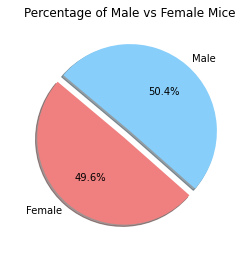

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_chart = final_df[['Mouse ID','Sex']]
pie_chart = pd.DataFrame(pie_chart.drop_duplicates())
pie_chart = pie_chart.groupby(['Sex'],as_index=True).count()
pie_chart = pd.DataFrame(pie_chart.rename(columns={"Mouse ID":"Count"}))
colors = ["lightcoral", "lightskyblue"]
explode = (0.1, 0)
pie_final = pie_chart.plot(kind='pie',y="Count",explode=explode,colors=colors,legend=False,autopct="%1.1f%%",
            title='Percentage of Male vs Female Mice',startangle=140,shadow=True)
pie_final.set_xlabel(' ')
pie_final.set_ylabel(' ')
pie_final

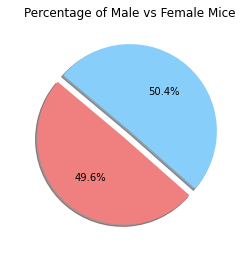

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_chart['Count'], explode=explode,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Percentage of Male vs Female Mice')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

## Quartiles, Outliers and Boxplots

In [126]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
deletemeds = ['Ketapril','Naftisol','Placebo','Propriva','Stelasyn','Zoniferol']

# Start by getting the last (greatest) timepoint for each mouse
lasttp = final_df[['Mouse ID','Drug Regimen','Timepoint']]
lasttp = lasttp.groupby(['Mouse ID']).max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
originaldf = final_df[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
quart_merge = pd.merge(lasttp, originaldf, how='right', on='Mouse ID')
quart_merge = quart_merge[quart_merge['Timepoint_x']==quart_merge['Timepoint_y']]
quart_merge = quart_merge.drop(columns=['Drug Regimen_y','Timepoint_y'])
quart_merge = quart_merge.rename(columns={"Drug Regimen_x":"Drug Regimen","Timepoint_x":"Timepoint"})
quart_merge = quart_merge.set_index(['Drug Regimen'])
quart_merge = quart_merge.drop(index=deletemeds)
quart_merge = quart_merge.drop(columns='Timepoint')
quart_merge

,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Infubinol,a203,67.973419
Infubinol,a251,65.525743
Ceftamin,a275,62.999356
Ramicane,a411,38.407618
Ramicane,a444,43.047543
...,...,...
Ceftamin,y769,68.594745
Capomulin,y793,31.896238
Ceftamin,y865,64.729837


In [227]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumordata0 = []
tumordata1 = []
tumordata2 = []
tumordata3 = []
tumors = [tumordata0,tumordata1,tumordata2,tumordata3]
# Locate the rows which contain mice on each drug and get the tumor volumes
for ind in quart_merge.index:
    if treatments[0]==ind:
        tumordata0 = pd.DataFrame(quart_merge['Tumor Volume (mm3)'][ind].to_list())
    if treatments[1]==ind:
        tumordata1 = pd.DataFrame(quart_merge['Tumor Volume (mm3)'][ind].to_list())
    if treatments[2]==ind:
        tumordata2 = pd.DataFrame(quart_merge['Tumor Volume (mm3)'][ind].to_list())
    if treatments[3]==ind:
        tumordata3 = pd.DataFrame(quart_merge['Tumor Volume (mm3)'][ind].to_list())
tumorsvals = [tumordata0,tumordata1,tumordata2,tumordata3]
        
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
countts = 0
for tumorval in tumorsvals:
    quartiles = tumorval.quantile([.25,.5,.75])
    lowerq = quartiles[0][0.25]
    upperq = quartiles[0][0.75]
    iqr = upperq-lowerq
    print(f"The interquartile range of tumor volumes for {treatments[countts]} is: {iqr}")
    countts = countts+1
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
# Create DataFrame from obtained data
tumordata = pd.DataFrame(tumordata0)
tumordata.columns=['Capomulin']
tumordata['Ramicane']= tumordata1
tumordata['Infubinol']= tumordata2
tumordata['Ceftamin']= tumordata3
tumordata

The interquartile range of tumor volumes for Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The interquartile range of tumor volumes for Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The interquartile range of tumor volumes for Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The interquartile range of tumor volumes for Ceftamin is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


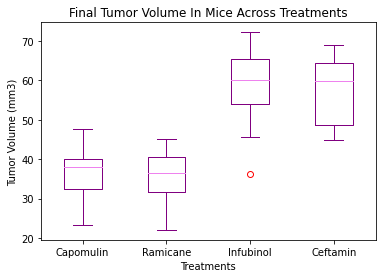

In [276]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumordata,labels=treatments, boxprops=dict(color='purple'),
           capprops=dict(color='purple'),
            whiskerprops=dict(color='purple'),
            flierprops=dict(color='purple', markeredgecolor='red'),
            medianprops=dict(color='violet'))
plt.title('Final Tumor Volume In Mice Across Treatments')
plt.xlabel('Treatments')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

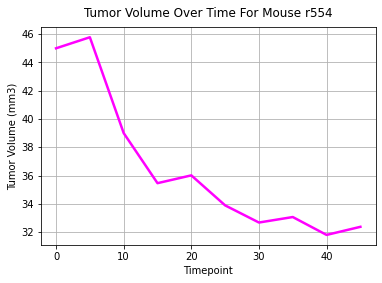

In [301]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
filtercap = ['Ramicane', 'Infubinol','Ceftamin']
getidscap = quart_merge.drop(index=filtercap)
getidscap = getidscap['Mouse ID'].to_list()
capchoice = rd.choice(getidscap) 
getdata_cap = final_df[final_df['Mouse ID'] == capchoice]
getdata_cap = getdata_cap[['Timepoint','Tumor Volume (mm3)']]
getdata_cap.set_index('Timepoint')['Tumor Volume (mm3)'].plot(linewidth=2.5, color='magenta',grid=True)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f'Tumor Volume Over Time For Mouse {capchoice}', y=1.02)
plt.show()

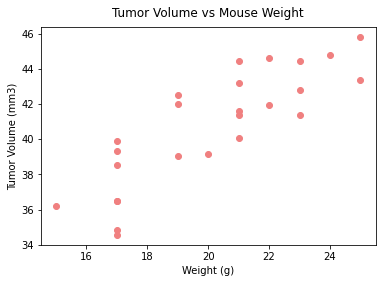

In [311]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatterdf = final_df[['Mouse ID','Drug Regimen','Weight (g)','Tumor Volume (mm3)']]
scatterdf = scatterdf[scatterdf['Drug Regimen'] == 'Capomulin']
scatterdf = scatterdf.groupby(['Mouse ID']).mean()
plt.scatter(scatterdf['Weight (g)'],scatterdf['Tumor Volume (mm3)'],c='lightcoral')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f'Tumor Volume vs Mouse Weight', y=1.02)
plt.show()

## Correlation and Regression

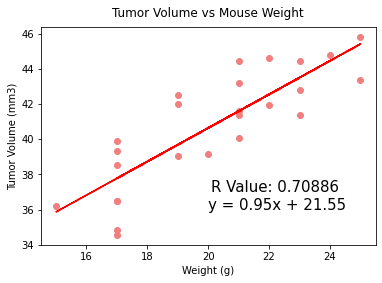

In [330]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = scatterdf['Weight (g)']
y_values = scatterdf['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='lightcoral')
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(20,36),fontsize=15,color="black")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(20.1,37),fontsize=15,color="black")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f'Tumor Volume vs Mouse Weight', y=1.02)
plt.show()